In [2]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

In [3]:
#Read the dataset
df = pd.read_csv('retail_data.csv')

In [4]:
#Top 10 rows of my dataset
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [5]:
#Dataset's dimensions
df.shape

(3900, 18)

In [6]:
#A brief overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
#Some descriptives
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
#Checking for dublicates
df.duplicated().any()

False

In [9]:
#How many customers are male/female?
# Count of each gender
gender_counts = df['Gender'].value_counts()

# Total count
total_count = gender_counts.sum()

# Percentage of each gender
gender_percentages = gender_counts / total_count * 100

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Gender': gender_counts.index,
                          'Count': gender_counts.values,
                          '% Count': gender_percentages.values})

print(result_df)

   Gender  Count  % Count
0    Male   2652     68.0
1  Female   1248     32.0


In [10]:
# Do the customers prefer to have a subscription?
# Count of subscribed Customers
subscr_counts = df['Subscription Status'].value_counts()

# Percentages
subscr_percentages = subscr_counts / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({'Subscription Status': subscr_counts.index,
                          'Count': subscr_counts.values,
                          '% Count': subscr_percentages.values})

print(result_df)

  Subscription Status  Count  % Count
0                  No   2847     73.0
1                 Yes   1053     27.0


In [11]:
#Which clothing items are purchased the most?
item_counts = df['Item Purchased'].value_counts()

# Percentages
item_percentages = item_counts / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({'Item Purchased': item_counts.index,
                          'Count': item_counts.values,
                          '% Count': item_percentages.values})

print(result_df)

   Item Purchased  Count   % Count
0          Blouse    171  4.384615
1         Jewelry    171  4.384615
2           Pants    171  4.384615
3           Shirt    169  4.333333
4           Dress    166  4.256410
5         Sweater    164  4.205128
6          Jacket    163  4.179487
7            Belt    161  4.128205
8      Sunglasses    161  4.128205
9            Coat    161  4.128205
10        Sandals    160  4.102564
11          Socks    159  4.076923
12          Skirt    158  4.051282
13         Shorts    157  4.025641
14          Scarf    157  4.025641
15            Hat    154  3.948718
16        Handbag    153  3.923077
17         Hoodie    151  3.871795
18          Shoes    150  3.846154
19        T-shirt    147  3.769231
20       Sneakers    145  3.717949
21          Boots    144  3.692308
22       Backpack    143  3.666667
23         Gloves    140  3.589744
24          Jeans    124  3.179487


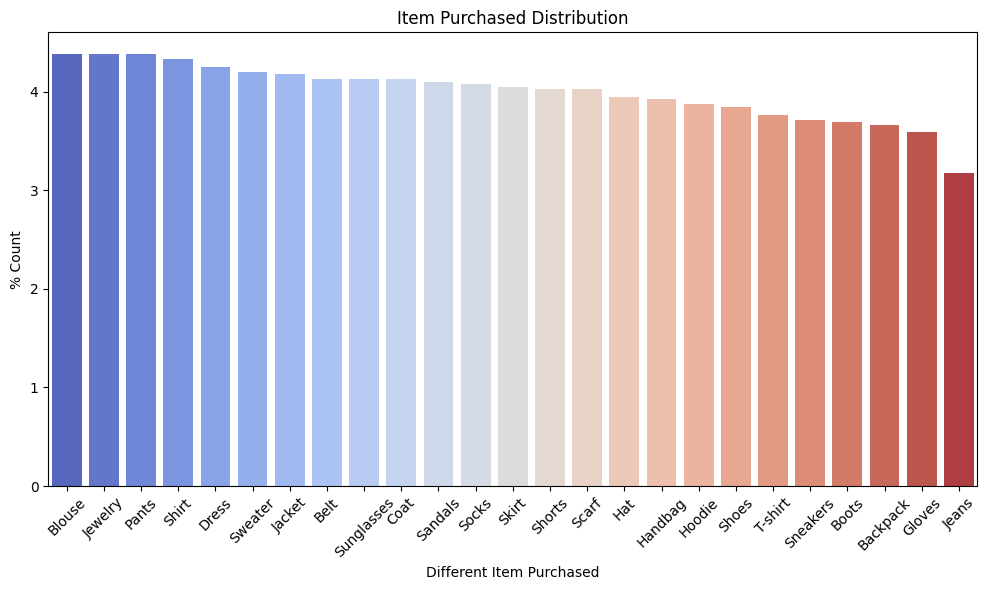

In [12]:
#Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='% Count', data=result_df, palette='coolwarm')
plt.title('Item Purchased Distribution')
plt.xlabel('Different Item Purchased')
plt.ylabel('% Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [13]:
#Which category items are purchased the most?
category_counts = df['Category'].value_counts()

# Percentages
category_percentages = category_counts  / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({"Items' Categories": category_counts.index,
                          'Count': category_counts.values,
                          '% Count': category_percentages.values})

print(result_df)

  Items' Categories  Count    % Count
0          Clothing   1737  44.538462
1       Accessories   1240  31.794872
2          Footwear    599  15.358974
3         Outerwear    324   8.307692


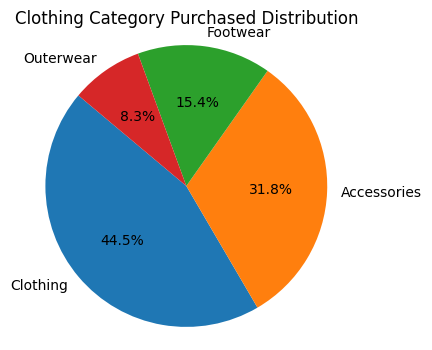

In [14]:
#Pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Clothing Category Purchased Distribution')
plt.axis('equal') 
plt.show()

In [15]:
#Where the do most customers live?
location_counts = df['Location'].value_counts()

# Percentages
location_percentages = location_counts  / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({"Different Locations": location_counts.index,
                          'Count': location_counts.values,
                          '% Count': location_percentages.values})

print(result_df)

   Different Locations  Count   % Count
0              Montana     96  2.461538
1           California     95  2.435897
2                Idaho     93  2.384615
3             Illinois     92  2.358974
4              Alabama     89  2.282051
5            Minnesota     88  2.256410
6             Nebraska     87  2.230769
7             New York     87  2.230769
8               Nevada     87  2.230769
9             Maryland     86  2.205128
10            Delaware     86  2.205128
11             Vermont     85  2.179487
12           Louisiana     84  2.153846
13        North Dakota     83  2.128205
14            Missouri     81  2.076923
15       West Virginia     81  2.076923
16          New Mexico     81  2.076923
17         Mississippi     80  2.051282
18             Indiana     79  2.025641
19             Georgia     79  2.025641
20            Kentucky     79  2.025641
21            Arkansas     79  2.025641
22      North Carolina     78  2.000000
23         Connecticut     78  2.000000


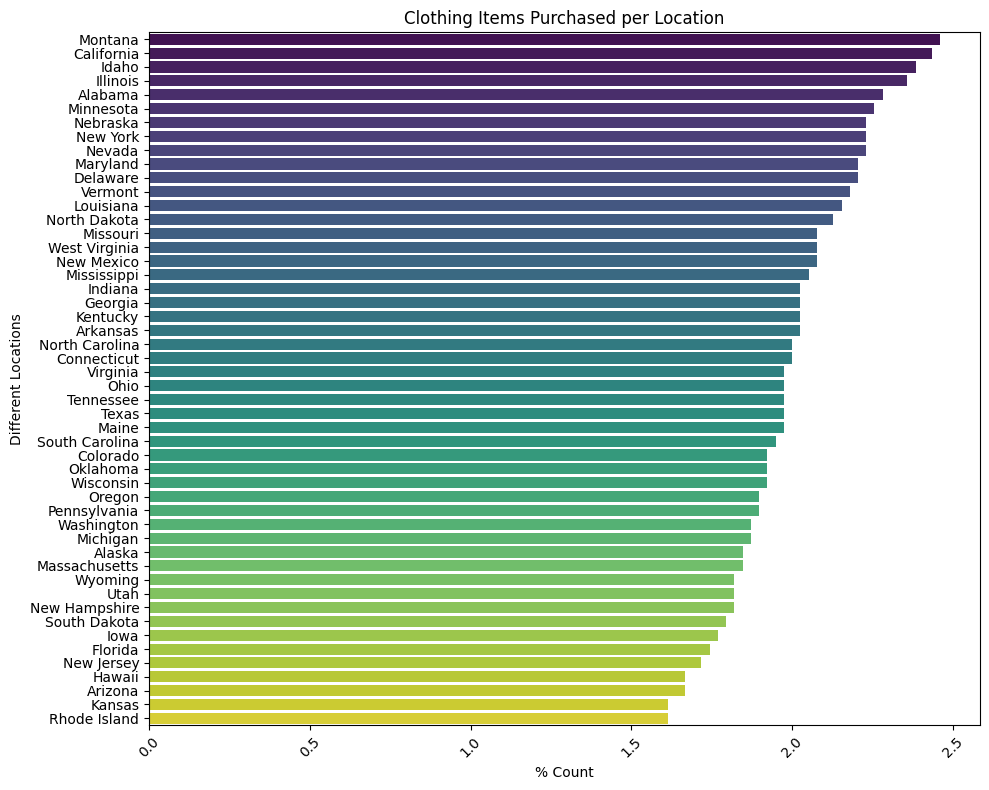

In [16]:
#Horizontal Bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='% Count', y='Different Locations', data=result_df, palette='viridis')
plt.title('Clothing Items Purchased per Location')
plt.xlabel('% Count')
plt.ylabel('Different Locations')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [17]:
 #Which item size is the most buyable?
size_counts = df['Size'].value_counts()

# Percentages
size_percentages = size_counts  / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({"Size of Items": size_counts.index,
                          'Count': size_counts.values,
                          '% Count': size_percentages.values})

print(result_df)

  Size of Items  Count  % Count
0             M   1755     45.0
1             L   1053     27.0
2             S    663     17.0
3            XL    429     11.0


In [18]:
#Which colors are the most preferable?
color_counts = df['Color'].value_counts()

# Percentages
color_percentages = color_counts  / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({"Color of Items": color_counts.index,
                          'Count': color_counts.values,
                          '% Count': color_percentages.values})

print(result_df)

   Color of Items  Count   % Count
0           Olive    177  4.538462
1          Yellow    174  4.461538
2          Silver    173  4.435897
3            Teal    172  4.410256
4           Green    169  4.333333
5           Black    167  4.282051
6            Cyan    166  4.256410
7          Violet    166  4.256410
8            Gray    159  4.076923
9          Maroon    158  4.051282
10         Orange    154  3.948718
11       Charcoal    153  3.923077
12           Pink    153  3.923077
13        Magenta    152  3.897436
14           Blue    152  3.897436
15         Purple    151  3.871795
16          Peach    149  3.820513
17            Red    148  3.794872
18          Beige    147  3.769231
19         Indigo    147  3.769231
20       Lavender    147  3.769231
21      Turquoise    145  3.717949
22          White    142  3.641026
23          Brown    141  3.615385
24           Gold    138  3.538462


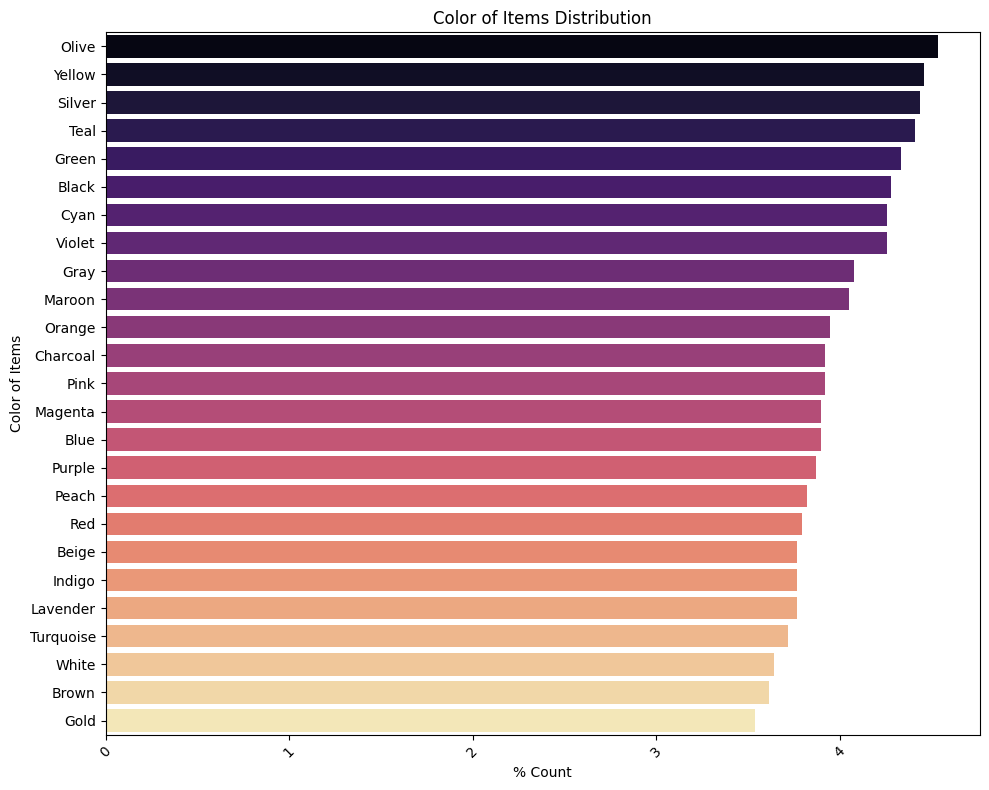

In [19]:
#Horizontal Bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='% Count', y='Color of Items', data=result_df, palette='magma')
plt.title('Color of Items Distribution')
plt.xlabel('% Count')
plt.ylabel('Color of Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [20]:
#Is there any difference of the Season items that the customers bought?
season_counts = df['Season'].value_counts()

# Percentages
season_percentages = season_counts  / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({"Season": season_counts.index,
                          'Count': season_counts.values,
                          '% Count': season_percentages.values})

print(result_df)

   Season  Count    % Count
0  Spring    999  25.615385
1    Fall    975  25.000000
2  Winter    971  24.897436
3  Summer    955  24.487179


In [21]:
#Is there any difference of the payment method utilized?
payments_counts = df['Payment Method'].value_counts()

# Percentages
payments_percentages = payments_counts  / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({"Payment Method": payments_counts.index,
                          'Count': payments_counts.values,
                          '% Count': payments_percentages.values})

print(result_df)

  Payment Method  Count    % Count
0         PayPal    677  17.358974
1    Credit Card    671  17.205128
2           Cash    670  17.179487
3     Debit Card    636  16.307692
4          Venmo    634  16.256410
5  Bank Transfer    612  15.692308


In [22]:
#Is there any difference of the shipping type utilized?
shipping_counts = df['Shipping Type'].value_counts()

# Percentages
shipping_percentages = shipping_counts / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({"Shipping Type": shipping_counts.index,
                          'Count': shipping_counts.values,
                          '% Count': shipping_percentages.values})

print(result_df)

    Shipping Type  Count    % Count
0   Free Shipping    675  17.307692
1        Standard    654  16.769231
2    Store Pickup    650  16.666667
3    Next Day Air    648  16.615385
4         Express    646  16.564103
5  2-Day Shipping    627  16.076923


In [23]:
#How many customers bought their products with discount?
discount_counts = df['Discount Applied'].value_counts()

# Percentages
discount_percentages = discount_counts / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({"Discount Applied": discount_counts.index,
                          'Count': discount_counts.values,
                          '% Count': discount_percentages.values})

print(result_df)

  Discount Applied  Count  % Count
0               No   2223     57.0
1              Yes   1677     43.0


In [24]:
#Do the fields Promo Code Used and Discount Applied are the same? (dublicate fields?)
(df['Discount Applied']==df['Promo Code Used']).sum()

3900

In [25]:
#Drop the duplicate column
df.drop(columns=['Promo Code Used'], inplace=True)

In [26]:
#How often the customers do buy products?
frequency_counts = df['Frequency of Purchases'].value_counts()

# Percentages
frequency_percentages = frequency_counts / total_count * 100

#Results as Dataframe
result_df = pd.DataFrame({"Frequency of Purchases": frequency_counts .index,
                          'Count': frequency_counts .values,
                          '% Count': frequency_percentages.values})

print(result_df)

  Frequency of Purchases  Count    % Count
0         Every 3 Months    584  14.974359
1               Annually    572  14.666667
2              Quarterly    563  14.435897
3                Monthly    553  14.179487
4              Bi-Weekly    547  14.025641
5            Fortnightly    542  13.897436
6                 Weekly    539  13.820513


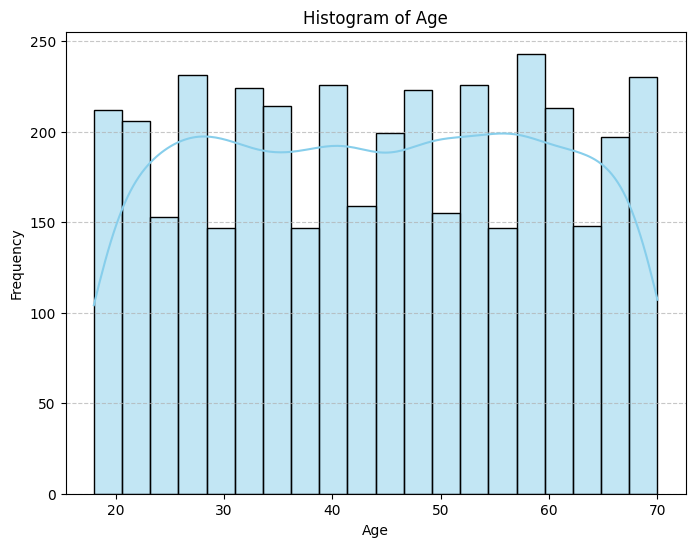

In [27]:
### Numeric Data
#histogram of Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

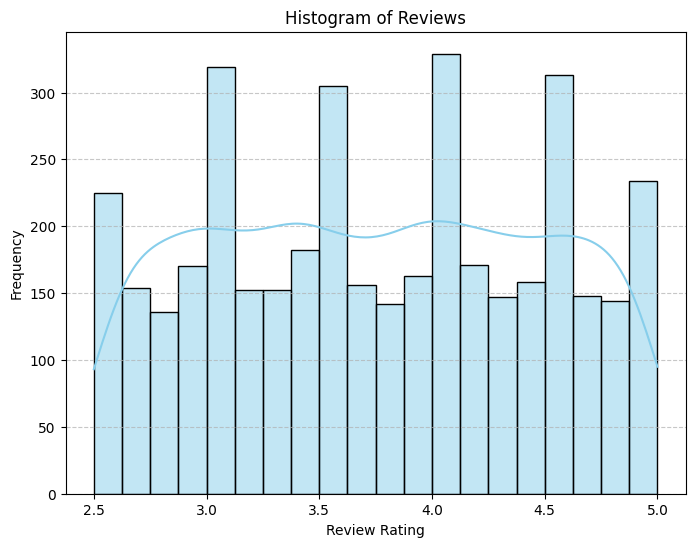

In [28]:
#histogram of Review Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Review Rating'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Reviews')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We will do a different segmentation of the Reviews. Ideally the accepted values will be 2.5, 3, 3.5 etc

In [29]:
# Define the bin edges
new_bins = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Define the bin labels
labels = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Discretize the 'Review Rating' column into bins and map the bin labels
df['Review Rating'] = pd.cut(df['Review Rating'], bins=new_bins, labels=labels, right=False)

# Display unique values in the 'Review Rating' column to verify
print(df['Review Rating'].unique())

[3.5, 4.0, 3.0, 5.0, 4.5, NaN]
Categories (9, float64): [1.0 < 1.5 < 2.0 < 2.5 ... 3.5 < 4.0 < 4.5 < 5.0]


In [30]:
#How many NaN values do I have?
(df['Review Rating']=='NaN').sum()

0

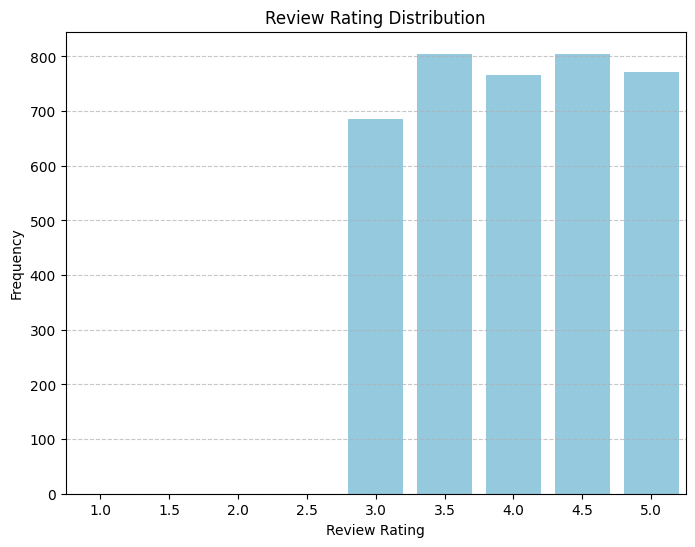

In [31]:
# New bar plot of Review Rating Distribution with discrete values
plt.figure(figsize=(8, 6))
sns.countplot(x='Review Rating', data=df, color='skyblue')
plt.title('Review Rating Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

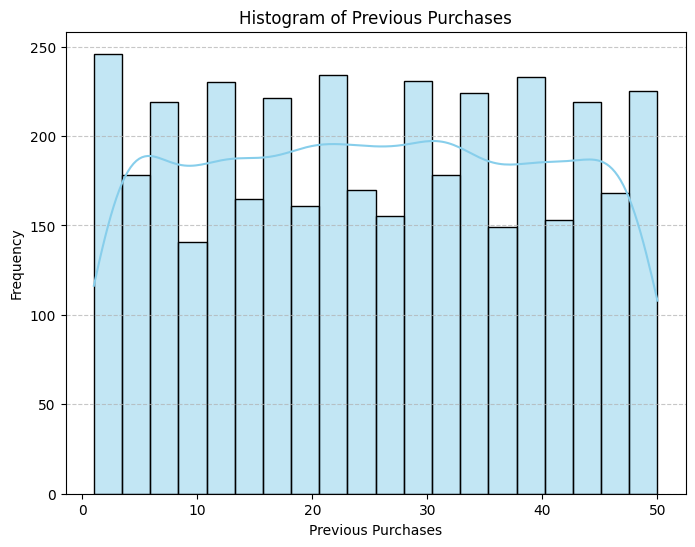

In [32]:
#histogram of Previous Purchased Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Previous Purchases'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

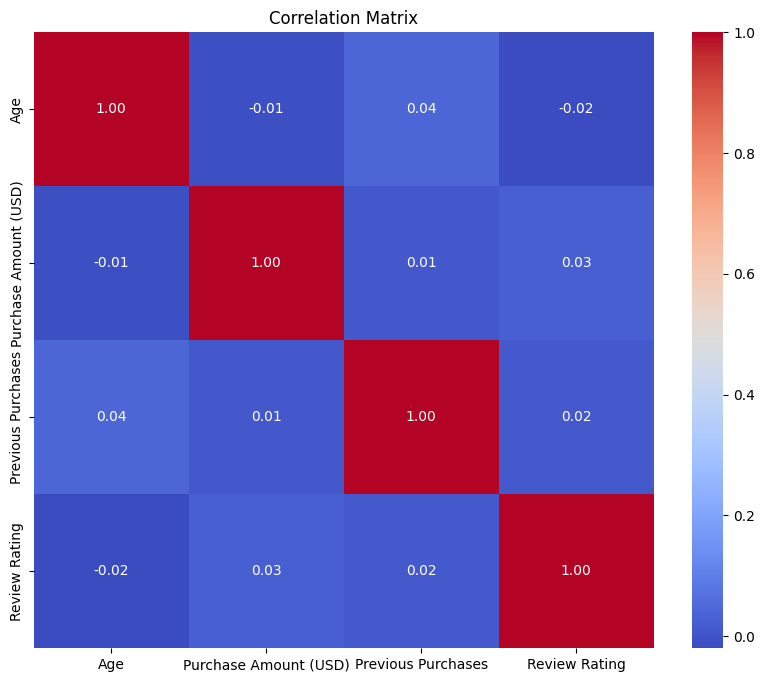

In [33]:
#Linear Correlation
df_numeric=df[['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

As evident, there is no discernible correlation among the numeric variables. This is intriguing, considering my assertion regarding a potential relationship between "Purchase Amount (USD)" and "Previous Purchases," or between "Previous Purchases" and "Review Rating."

In [34]:
#I will perform RFM Analysis and then implement some clustering technique.
#We do not have Recency as a dataset Variable so I will extract this information (feature engineering)
#from 'Frequency of Purchases'
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

At this point, I will make a caveat. I'll assume the variables: 
'Every 3 Months' 
'Quarterly'
have the same meaning even though they're slightly different so I can move on.

In [35]:
# Mapping dictionary for sub-categories of the "Frequency of Purchases" to numeric values
frequency_mapping = {
    'Every 3 Months': 90,
    'Annually': 360,
    'Quarterly': 90,
    'Monthly': 30,
    'Bi-Weekly': 4,
    'Fortnightly': 14,
    'Weekly': 7
}

# Create the 'Recency' column based on the above mapping
df['Recency'] = df['Frequency of Purchases'].map(frequency_mapping).astype(int)

In [36]:
#The distribution of the Recency
df['Recency'].value_counts().sort_index(ascending=False)

Recency
360     572
90     1147
30      553
14      542
7       539
4       547
Name: count, dtype: int64

In [37]:
#Rename the columns to be easily handled
df = df.rename(columns={'Purchase Amount (USD)': 'Monentary', 'Previous Purchases': 'Frequency'})

In [38]:
#Select the subset of my original data to perform clustering
customer_df= df[['Recency', 'Frequency', 'Monentary']]

In [39]:
#Standardlize the data so as to perform better
scaler = StandardScaler()

cdf = scaler.fit_transform(customer_df)

We will choose the optimal number of clusters based on the combination of the info we will receive from: 
1. Elbow Curve
2. Silloutte Analysis

In [40]:
#Elbow Curve to get the right number of Clusters
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cdf)

    ssd.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

For n_clusters=2, the Elbow score is 8747.197917164192
For n_clusters=3, the Elbow score is 5615.46166708764
For n_clusters=4, the Elbow score is 4144.976069146447
For n_clusters=5, the Elbow score is 3638.1421059418944
For n_clusters=6, the Elbow score is 2664.563555563005
For n_clusters=7, the Elbow score is 2404.8805647815434
For n_clusters=8, the Elbow score is 2185.445843929431
For n_clusters=9, the Elbow score is 1945.0652143970476
For n_clusters=10, the Elbow score is 1846.7620709207392
For n_clusters=11, the Elbow score is 1585.1466045593309
For n_clusters=12, the Elbow score is 1543.2151173501973


In [41]:
#Plot the above information via Elbow curve
fig = px.line(x=range_n_clusters, y=ssd,
              title="Elbow Curve for K-Means Clustering",
              labels={'x': 'Number of Clusters', 'y': 'Sum of Squared Distances (SSD)'})

fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [42]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cdf)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(cdf, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.26357446288927033
For n_clusters=3, the silhouette score is 0.34607791521446324
For n_clusters=4, the silhouette score is 0.3562560126434632
For n_clusters=5, the silhouette score is 0.3505409748343055
For n_clusters=6, the silhouette score is 0.36962235110892827
For n_clusters=7, the silhouette score is 0.3458552917149697
For n_clusters=8, the silhouette score is 0.3261239600879787
For n_clusters=9, the silhouette score is 0.31435665892876163
For n_clusters=10, the silhouette score is 0.324564761906798
For n_clusters=11, the silhouette score is 0.3255271430430252
For n_clusters=12, the silhouette score is 0.3147993513619742


It appears that the optimal number of clusters are 4

In [43]:
#Clustering with Optimal Number of Clusters
k = 4
model = KMeans(n_clusters=k, n_init='auto', max_iter=1000, random_state=22)
cluster_k = model.fit_predict(cdf)

In [44]:
#Store the kmeans model as dataframe
data = pd.DataFrame(cdf, columns= customer_df.columns, index= customer_df.index)

#Change the name of cluster_k to Cluster
data['cluster'] = cluster_k

#Give the number of customers per cluster (CustCnt)
data['cluster'].value_counts(ascending=False)

cluster
0    1245
3    1065
2    1018
1     572
Name: count, dtype: int64

In [45]:
#Asign the cluster column to the original dataset
df = df.assign(cluster=data['cluster'])

In [46]:
#Convert the type from categorical to float
df['Review Rating']=df['Review Rating'].astype(float)

In [47]:
# Observing the average customer case
means_df= df.groupby('cluster')[['Recency', 'Monentary', 'Frequency', 'Age', 'Review Rating']].mean()
means_df

,Recency,Monentary,Frequency,Age,Review Rating
cluster,,,,,
0,40.704418,62.460241,40.600803,44.967871,4.029796
1,360.000000,60.173077,24.561189,44.666084,4.025755
2,39.501965,80.466601,15.194499,43.359528,4.027473
3,39.886385,36.604695,17.658216,43.373709,4.007191


We will explore the clusters via some descriptives

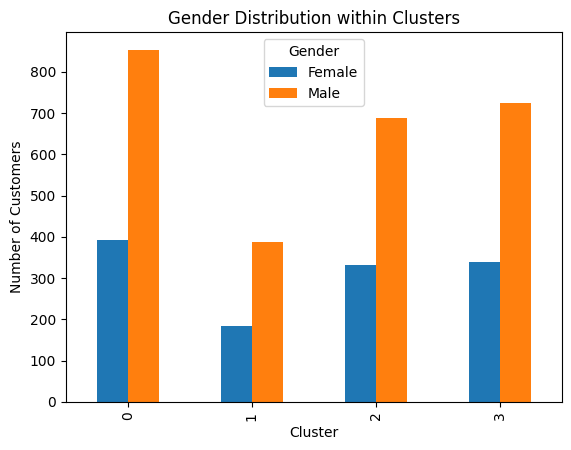

In [48]:
## GENDER

gender_counts=df.groupby(['cluster', 'Gender'])['Gender'].count()

# Plot the bar plot
gender_counts.unstack().plot(kind='bar')

# Set the labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution within Clusters')

# Show the plot
plt.show()

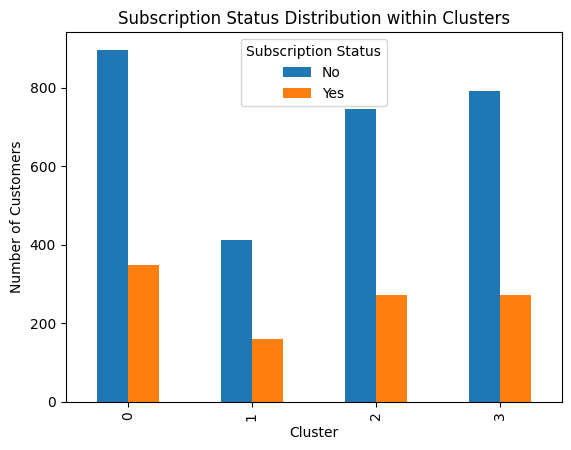

In [49]:
## SUBSCRIPTION STATUS

subscription_counts=df.groupby(['cluster', 'Subscription Status'])['Subscription Status'].count()

# Plot the bar plot
subscription_counts.unstack().plot(kind='bar')

# Set the labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Subscription Status Distribution within Clusters')

# Show the plot
plt.show()

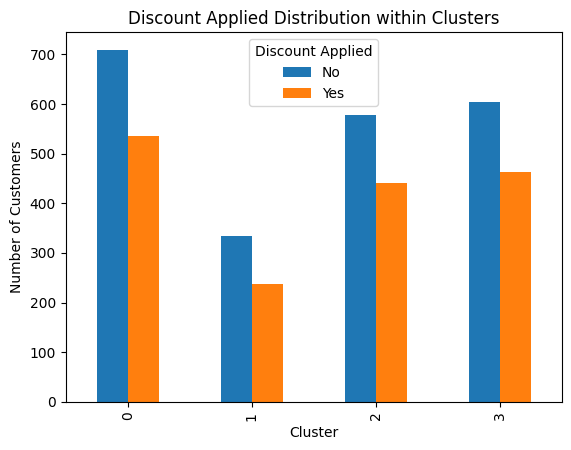

In [50]:
## DISCOUNT

discountAp_counts=df.groupby(['cluster', 'Discount Applied'])['Discount Applied'].count()

# Plot the bar plot
discountAp_counts.unstack().plot(kind='bar')

# Set the labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Discount Applied Distribution within Clusters')

# Show the plot
plt.show()

Across all clusters, customers made their purchases without utilizing any discount codes.

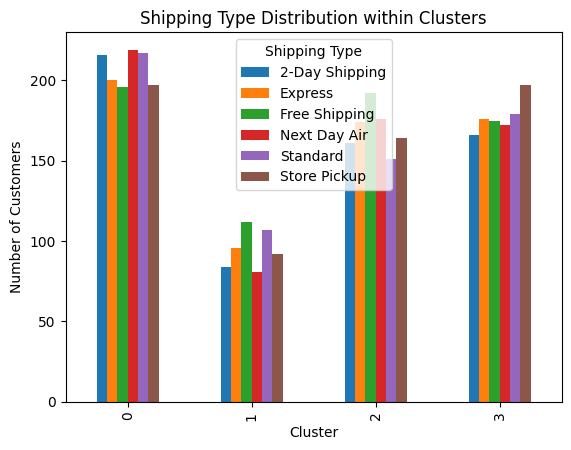

In [51]:
## SHIPPING METHOD

shippingtype_counts=df.groupby(['cluster', 'Shipping Type'])['Shipping Type'].count()

# Plot the bar plot
shippingtype_counts.unstack().plot(kind='bar')

# Set the labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Shipping Type Distribution within Clusters')

# Show the plot
plt.show()

As we can see there are differences of the shipping types that the customers chose between the different Clusters. 

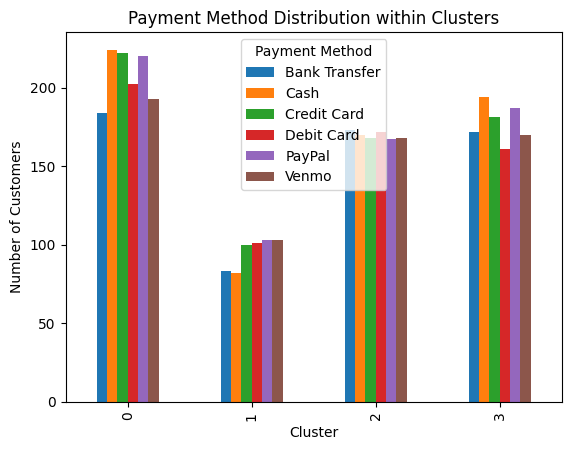

In [52]:
## PAYMENT TYPE

payment_counts=df.groupby(['cluster', 'Payment Method'])['Payment Method'].count()

# Plot the bar plot
payment_counts.unstack().plot(kind='bar')

# Set the labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Payment Method Distribution within Clusters')

# Show the plot
plt.show()

Once more, disparities in the chosen payment methods among the various clusters are apparent.

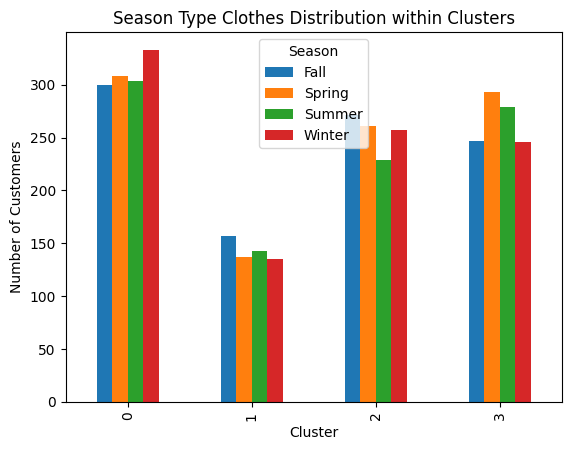

In [53]:
## SEASON

Season_counts=df.groupby(['cluster', 'Season'])['Season'].count()

# Plot the bar plot
Season_counts.unstack().plot(kind='bar')

# Set the labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Season Type Clothes Distribution within Clusters')

# Show the plot
plt.show()

Again customers across different clusters purchased clothing of varied seasonal types.

In summary, we establish that the various clusters comprise customers exhibiting distinct behaviors. From a business standpoint, this represents a well-organised segmentation, as it delineates distinct target groups.